In [30]:
Sys.time()

[1] "2021-01-09 19:40:01 IST"

In [1]:
Name <- "Name : Ramesh Bhutka"
sapID <-"Sap ID:- 53004190003"
Name; sapID

[1] "Name : Ramesh Bhutka"

[1] "Sap ID:- 53004190003"

### Columns

    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking, yes, no

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance


In [2]:
# dplyr is used for data manipulation 
library(dplyr)
# ggplot2 for visualization 
library(ggplot2)
#caTools for train/test split
library(caTools)
# corrgram for making neat correlation matrix plots
library(corrgram)
# mainly for One-Hot Encoding
library(caret)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lattice


Attaching package: 'lattice'


The following object is masked from 'package:corrgram':

    panel.fill




In [3]:
df <- read.csv("https://raw.githubusercontent.com/Ramesh-Bhutka/linear-regression-with-R/main/insurance.csv")

In [4]:
head(df)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


In [5]:
# number of rows with missing values
nrow(df) - sum(complete.cases(df))

[1] 0

In [6]:
str(df)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


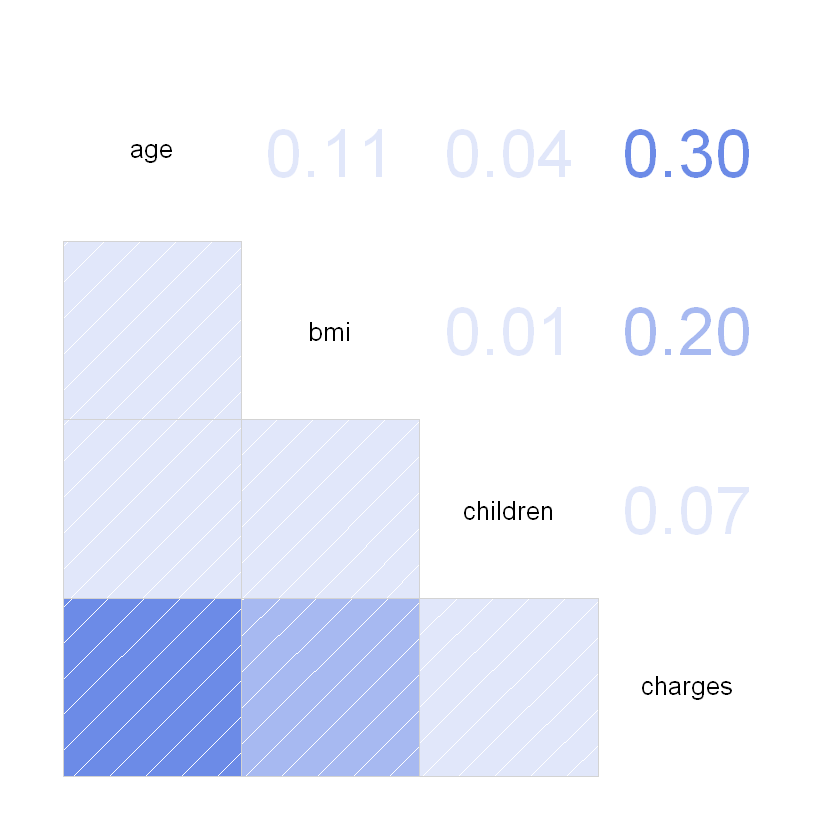

In [7]:
corrgram(df, lower.panel=panel.shade, upper.panel=panel.cor)

In [8]:
# By looking at columns — ‘sex’, ‘smoker’ and ‘region’ are in string format, 
# so we can work on converting them to numerical values using Label Encoding and one hot encoding 

In [9]:
# we will perform Label Encoding on sex and smoker column
df$sex <- ifelse(df$sex == "male",1,0)

table(df$sex)


  0   1 
662 676 

In [10]:
df$smoker <- ifelse(df$smoker == "yes",1,0)

table(df$smoker)


   0    1 
1064  274 

In [11]:
# we will perform One-Hot Encoding on region column

dmy <- dummyVars(" ~ .", data = df, fullRank = T)
df1 <- data.frame(predict(dmy, newdata = df))

glimpse(df1)

Rows: 1,338
Columns: 9
$ age             <dbl> 19, 18, 28, 33, 32, 31, 46, 37, 37, 60, 25, 62, 23,...
$ sex             <dbl> 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, ...
$ bmi             <dbl> 27.900, 33.770, 33.000, 22.705, 28.880, 25.740, 33....
$ children        <dbl> 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1, 1, ...
$ smoker          <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...
$ regionnorthwest <dbl> 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
$ regionsoutheast <dbl> 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, ...
$ regionsouthwest <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...
$ charges         <dbl> 16884.924, 1725.552, 4449.462, 21984.471, 3866.855,...


In [12]:
str(df1)

'data.frame':	1338 obs. of  9 variables:
 $ age            : num  19 18 28 33 32 31 46 37 37 60 ...
 $ sex            : num  0 1 1 1 1 0 0 0 1 0 ...
 $ bmi            : num  27.9 33.8 33 22.7 28.9 ...
 $ children       : num  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker         : num  1 0 0 0 0 0 0 0 0 0 ...
 $ regionnorthwest: num  0 0 0 1 1 0 0 1 0 1 ...
 $ regionsoutheast: num  0 1 1 0 0 1 1 0 0 0 ...
 $ regionsouthwest: num  1 0 0 0 0 0 0 0 0 0 ...
 $ charges        : num  16885 1726 4449 21984 3867 ...


In [13]:
summary(df1$charges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 

In [14]:
summary(df1)

      age             sex              bmi           children    
 Min.   :18.00   Min.   :0.0000   Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   1st Qu.:0.0000   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Median :1.0000   Median :30.40   Median :1.000  
 Mean   :39.21   Mean   :0.5052   Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00   3rd Qu.:1.0000   3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00   Max.   :1.0000   Max.   :53.13   Max.   :5.000  
     smoker       regionnorthwest  regionsoutheast regionsouthwest 
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.000   Median :0.0000  
 Mean   :0.2048   Mean   :0.2429   Mean   :0.272   Mean   :0.2429  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:1.000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
    charges     
 Min.   : 1122  
 1st Qu.: 4740  
 Median : 9

In [15]:
head(df1)

,age,sex,bmi,children,smoker,regionnorthwest,regionsoutheast,regionsouthwest,charges
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19,0,27.900,0,1,0,0,1,16884.924
2,18,1,33.770,1,0,0,1,0,1725.552
3,28,1,33.000,3,0,0,1,0,4449.462
4,33,1,22.705,0,0,1,0,0,21984.471
5,32,1,28.880,0,0,1,0,0,3866.855
6,31,0,25.740,0,0,0,1,0,3756.622


In [16]:
tail(df1)

,age,sex,bmi,children,smoker,regionnorthwest,regionsoutheast,regionsouthwest,charges
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1333,52,0,44.70,3,0,0,0,1,11411.685
1334,50,1,30.97,3,0,1,0,0,10600.548
1335,18,0,31.92,0,0,0,0,0,2205.981
1336,18,0,36.85,0,0,0,1,0,1629.833
1337,21,0,25.80,0,0,0,0,1,2007.945
1338,61,0,29.07,0,1,1,0,0,29141.360


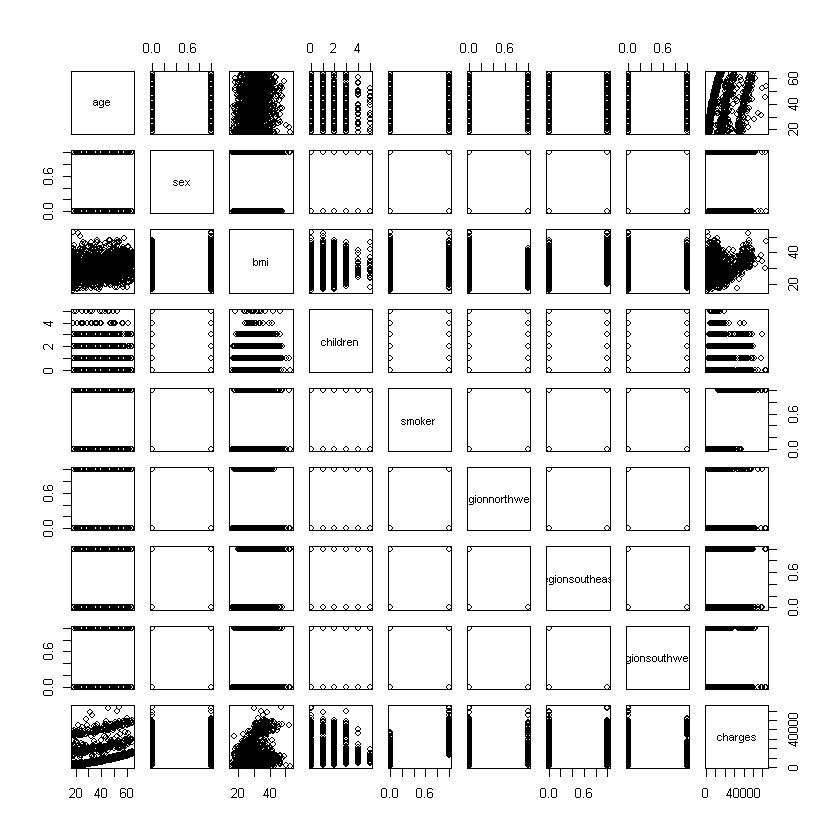

In [17]:
plot(df1)

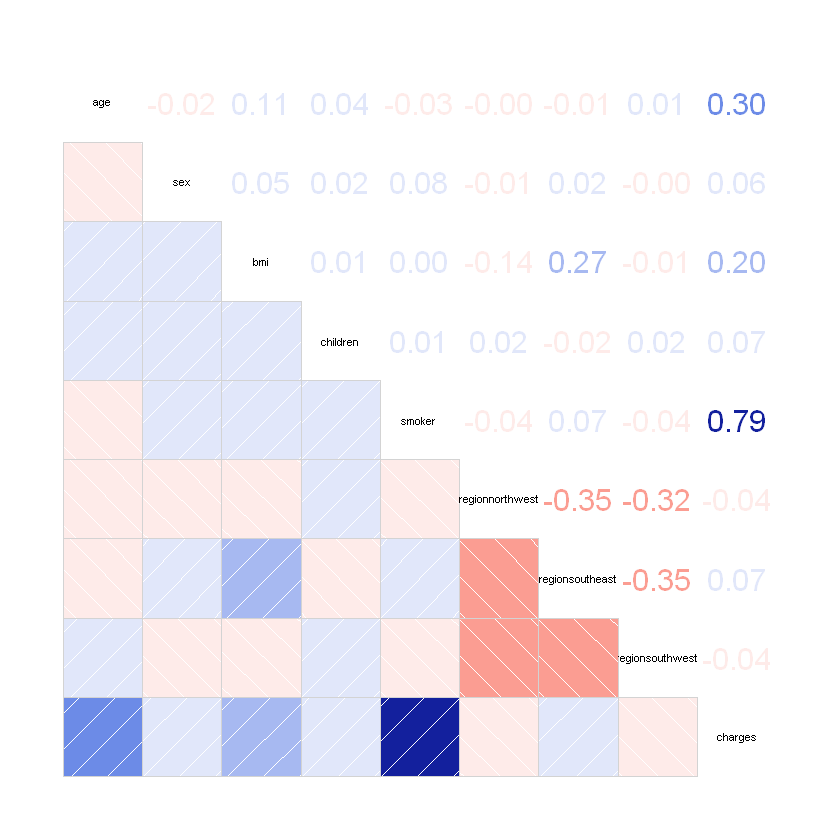

In [18]:
corrgram(df1, lower.panel=panel.shade, upper.panel=panel.cor)

In [19]:
# spliting the data into training and testing
set.seed(1080)
n = nrow(df1)
trainIndex = sample(1:n, size = round(0.7*n), replace=FALSE)
train = df1[trainIndex ,]
test = df1[-trainIndex ,]

In [20]:
nrow(train)

[1] 937

In [21]:
nrow(test)

[1] 401

In [22]:
# creating model
Model <- lm(charges ~., data=train)
summary(Model)


Call:
lm(formula = charges ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11599.5  -2637.2   -869.4   1389.9  25199.1 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11427.43    1150.09  -9.936   <2e-16 ***
age                249.52      13.86  18.005   <2e-16 ***
sex                133.07     390.79   0.341   0.7335    
bmi                323.29      33.00   9.796   <2e-16 ***
children           403.29     159.52   2.528   0.0116 *  
smoker           24345.19     485.38  50.157   <2e-16 ***
regionnorthwest   -242.36     560.08  -0.433   0.6653    
regionsoutheast  -1057.06     561.84  -1.881   0.0602 .  
regionsouthwest   -990.65     561.99  -1.763   0.0783 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5957 on 928 degrees of freedom
Multiple R-squared:  0.7626,	Adjusted R-squared:  0.7605 
F-statistic: 372.5 on 8 and 928 DF,  p-value: < 2.2e-16


In [23]:
# Prediction
pred <- predict(Model, test)
head(pred, n=10)

1         6         8        14        17        25        27        28 
25687.849  3572.165  7740.443 14362.107 11901.815  7562.360 11755.494 13456.274 
       32        33 
 1571.370  3585.422

In [24]:
# finding accuracy
rmse <- sqrt(mean(pred-df1$charges)^2)
rmse

Warning message in pred - df1$charges:
"longer object length is not a multiple of shorter object length"


[1] 254.3436

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



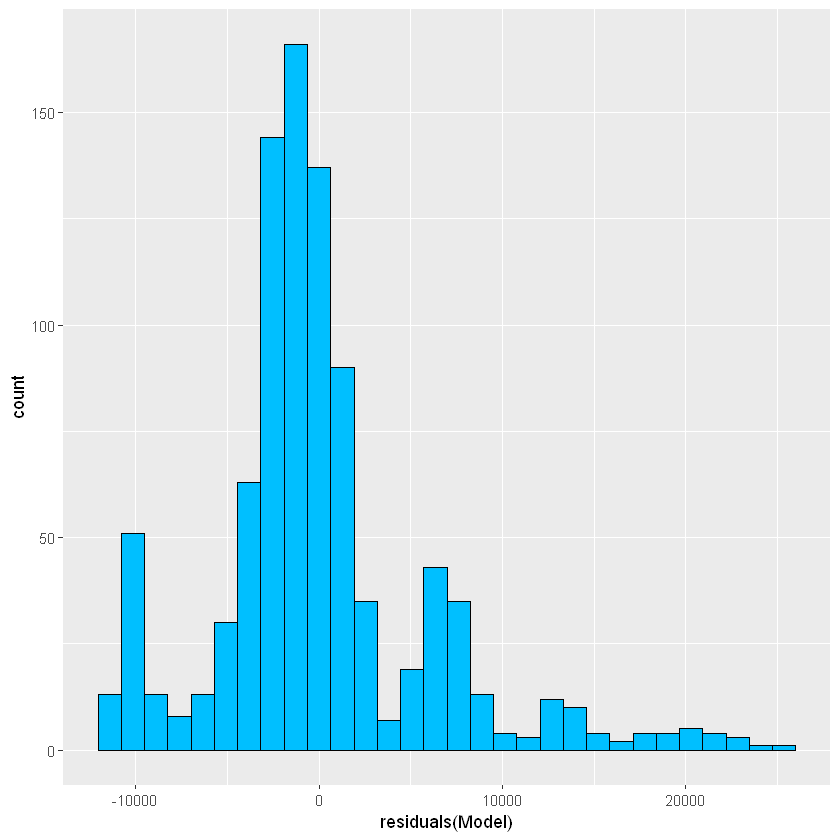

In [25]:
modelResiduals <- as.data.frame(residuals(Model)) 
ggplot(modelResiduals, aes(residuals(Model))) +
geom_histogram(fill='deepskyblue', color='black')

In [26]:
modelEval <- cbind(test$charges, pred)
colnames(modelEval) <- c('Actual', 'Predicted')
modelEval <- as.data.frame(modelEval)

In [27]:
head(modelEval, n=10)

,Actual,Predicted
,<dbl>,<dbl>
1,16884.924,25687.849
6,3756.622,3572.165
8,7281.506,7740.443
14,11090.718,14362.107
17,10797.336,11901.815
25,6203.902,7562.360
27,14451.835,11755.494
28,12268.632,13456.274
32,2198.190,1571.370


In [28]:
mse <- mean((modelEval$Actual - modelEval$Predicted)^2)
rmse <- sqrt(mse)

In [29]:
mse; rmse

[1] 40033245

[1] 6327.183